In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [70]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [71]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 10
)

In [72]:
dataset = pd.read_csv("csv/housing.csv")
dataset.dropna(inplace=True)
dataset = dataset.drop(columns = ['ocean_proximity'])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [73]:
tester = tester(X, y, generator, 10, 1, 1000, verbose = True, test_size = 0.3, random_state = 42)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.4046524046524047 Generation best 0.33345033345033354
Split:  0 Feature:  1
Iteration:  199 Best fitness:  0.3723843723843724 Generation best 0.34563934563934564
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.4412674412674412 Generation best 0.33142833142833144
Split:  0 Feature:  3
Iteration:  199 Best fitness:  0.387036387036387 Generation best 0.337650337650337755
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.37448137448137453 Generation best 0.33283833283833286
Split:  0 Feature:  5
Iteration:  199 Best fitness:  0.37637737637737634 Generation best 0.36612636612636623
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.40377340377340376 Generation best 0.39105939105939184
Split:  0 Feature:  7
Iteration:  199 Best fitness:  0.3877113877113877 Generation best 0.352470352470352577
Split:  0 Feature:  8
Iteration:  199 Best fitness:  0.44571344571344573 Generation best 0.35962235962235967
Split:  0 Feature:  9
I

In [74]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

10
9
3
10
10
10
10
9
10
10


In [75]:
tester.test_models(notests=8)

Iteration 1 - MSE 2907059948.5524735, R2 0.7819312368311172, MAE 36233.40173116431, NEW_MSE 3000538974.1377497, NEW_R2 0.7749190472470104, NEW_MAE 37210.79973349701
Iteration 3 - MSE 2907059948.5524735, R2 0.7819312368311172, MAE 36233.40173116431, NEW_MSE 3000538974.1377497, NEW_R2 0.7749190472470104, NEW_MAE 37210.79973349701
Iteration 5 - MSE 2907059948.5524735, R2 0.7819312368311172, MAE 36233.40173116431, NEW_MSE 3000538974.1377497, NEW_R2 0.7749190472470104, NEW_MAE 37210.79973349701
Iteration 7 - MSE 2907059948.5524735, R2 0.7819312368311172, MAE 36233.40173116431, NEW_MSE 3000538974.1377497, NEW_R2 0.7749190472470104, NEW_MAE 37210.79973349701
Iteration 1 - MSE 3152361876.392271, R2 0.7635302788344983, MAE 37248.27468143368, NEW_MSE 3373767792.293335, NEW_R2 0.7469218445079686, NEW_MAE 37639.2764711263
Iteration 3 - MSE 3058351936.8178654, R2 0.770582294139095, MAE 37162.26672396762, NEW_MSE 3392366146.2728863, NEW_R2 0.7455267167427784, NEW_MAE 37560.84868140004


In [ ]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,2.717337e+09,0.795089,35540.537104,2.754762e+09,0.792267,35331.255270
1,MLPRegressor,3.079557e+09,0.767774,36202.447349,3.486978e+09,0.737051,38437.685069
2,GradientBoostingRegressor,2.211883e+09,0.833205,30659.216362,2.330431e+09,0.824265,31414.921960


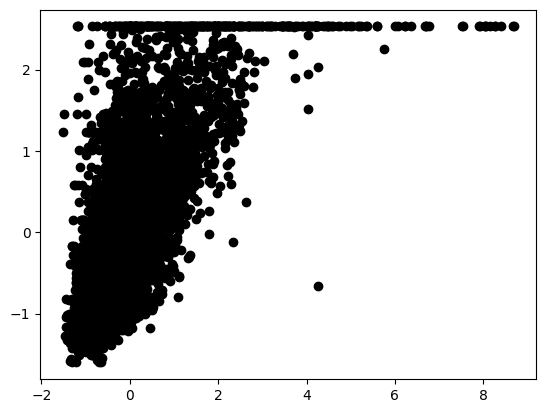

Min:  -1.5172846490633944 Max:  8.68921027183016 Mean:  -0.017253903666654066 Std:  0.9897472365072996


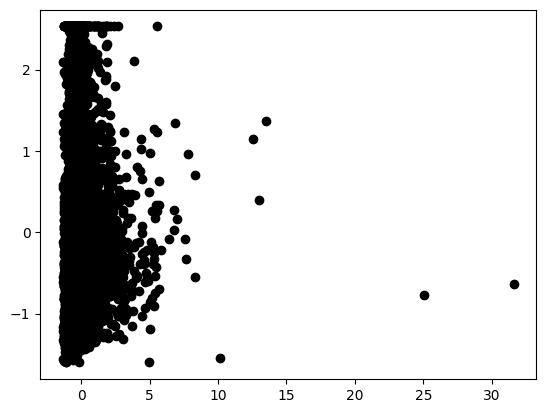

Min:  -1.3351050609634465 Max:  31.59537684188293 Mean:  0.0036829822635459104 Std:  1.1343496714580594


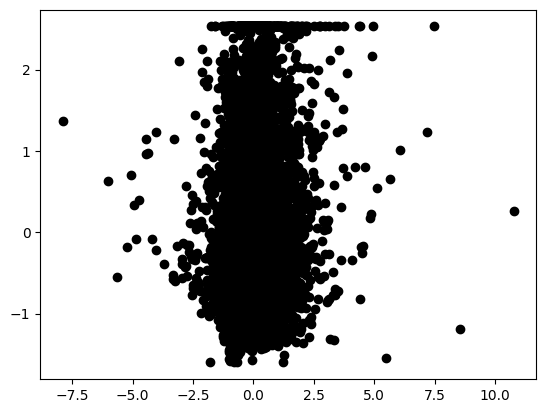

Min:  -7.890744203678977 Max:  10.771531829406921 Mean:  -0.010846531099378246 Std:  0.9729208146337814


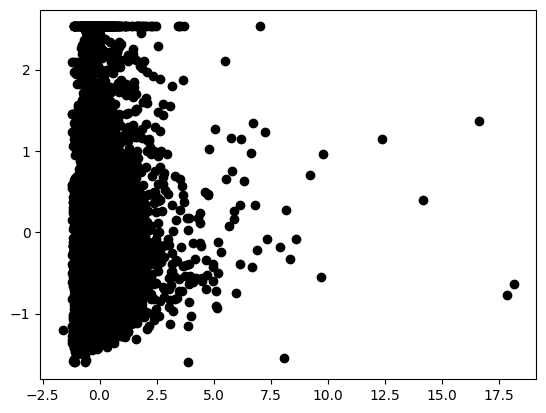

Min:  -1.6118758777393378 Max:  18.16282560009428 Mean:  -0.005072961603907104 Std:  1.060482194243523


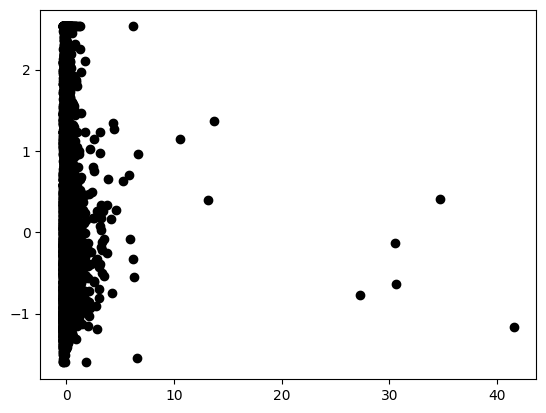

Min:  -0.3466133283516779 Max:  41.54665533458112 Mean:  0.010935829172046517 Std:  1.0908347521905009


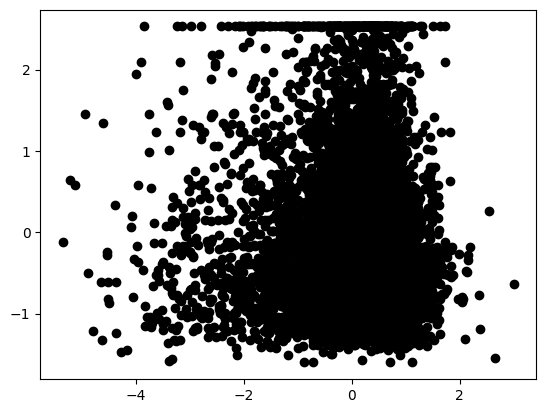

Min:  -5.354155891237084 Max:  3.002627446241369 Mean:  -0.01701756333438498 Std:  1.0229566972860207


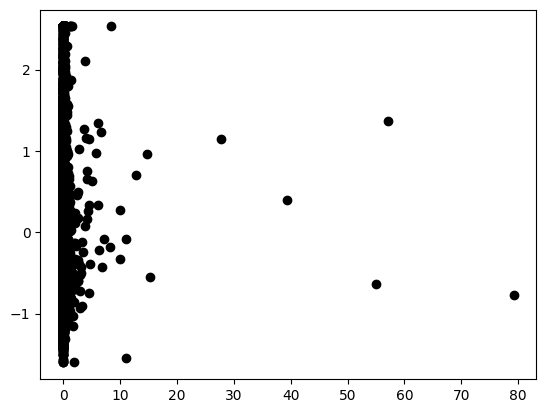

Min:  -0.12518466897605265 Max:  79.23673687710576 Mean:  0.025363809939248944 Std:  1.6632072875612907


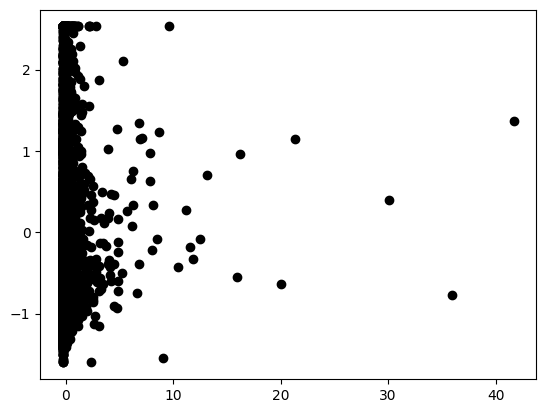

Min:  -0.26627398723144435 Max:  41.67429251180923 Mean:  0.008957579193907146 Std:  1.1736989859263145


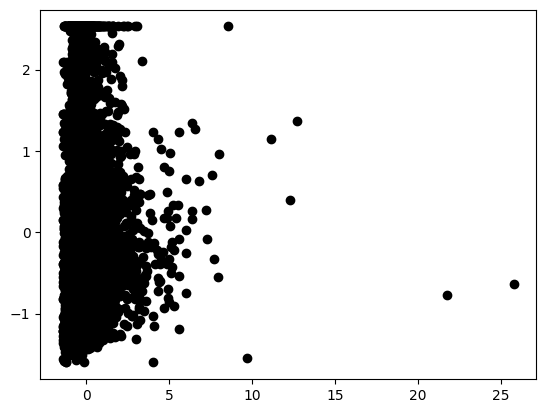

Min:  -1.4049130667229517 Max:  25.764256838937595 Mean:  0.0024277325682892747 Std:  1.1058052595911898


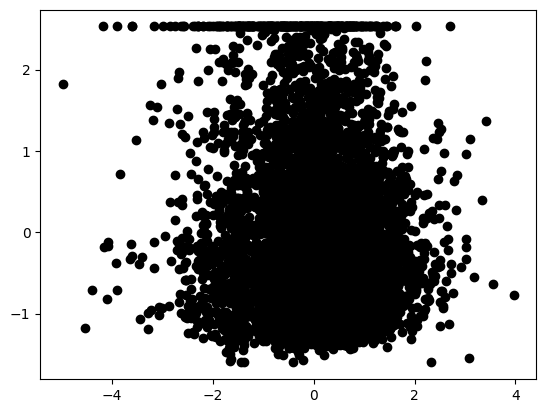

Min:  -4.967913421915845 Max:  3.9639963366244344 Mean:  -0.002712445741125375 Std:  0.9853653874613902


In [ ]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())